In [1]:
%matplotlib inline
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import netCDF4
#from mpl_toolkits.basemap import Basemap


In [2]:
data_dir = '/Volumes/ATLAS/reanalysis/'
nc_file = 'NA_2m_temp_1900-2010.nc'
months = pd.date_range('1900-01-01','2010-12-01',freq='MS')

In [3]:
#load nc file
nc_temp = xr.open_dataset(data_dir+nc_file)

temp = nc_temp['t2m']

In [5]:
temp = temp.sel(time=slice('1950-01-01','2010-12-01'))

last_30 = temp.sel(time=slice('1981-01-01','2010-12-01'))

In [9]:
monthly = last_30.groupby('time.season').mean('time')

In [10]:
temp_season = temp.sel(time=temp['time.season']=='JJA')

In [11]:
seasonal = temp_jan.groupby('time.year').mean(dim='time')

In [12]:
intermediate = seasonal-monthly.sel(season='JJA')

In [ ]:
test  = temp_jan - clim_norm

In [ ]:
intermediate

In [13]:
anom = intermediate.mean(dim=['latitude','longitude'])


In [ ]:
anom

In [ ]:
anom.coords['time']

In [ ]:
fig, ax = plt.subplots();
plt.plot(anom['year'],anom.values);
trend = ax.plot(anom['year'],line)
ax.set_title('North America 2m Temp Anomaly JJA 1900-2010')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature [C]')
fig.savefig('2m_temp_anom_JJA_na_test.png')



In [ ]:
import statsmodels as sm

In [ ]:
anom_series = anom.to_series()
windows = anom_series.rolling(window=20, win_type='gaussian').mean(std=1)

In [21]:
import scipy 

In [22]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.arange(0,len(mon_anom)),mon_anom.values)

In [23]:
slope_ncdc, intercept_ncdc, r_value_ncdc, p_value_ncdc, std_err_ncdc = scipy.stats.linregress(np.arange(0,len(celcius)),celcius)

In [24]:
line = slope*np.arange(0,len(anom.values))+intercept
ncdc_trend = slope_ncdc*np.arange(0,len(anom.values))+intercept_ncdc

In [ ]:
slope_ncdc

In [ ]:
plt.plot(anom['time'],line)

In [ ]:
slope*10

In [14]:
montana = intermediate.sel(latitude=np.arange(44,49,step=.5))

In [15]:
montana = montana.sel(longitude=np.arange(240,260,step=.5))


In [ ]:
montana

In [16]:
mon_anom = montana.mean(dim=['latitude','longitude'])

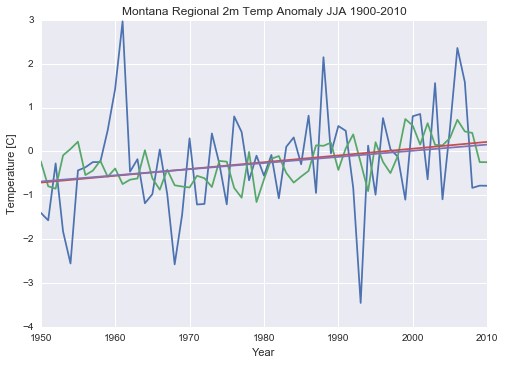

In [25]:
fig, ax = plt.subplots();
plt.plot(mon_anom['year'],mon_anom.values);
trend = ax.plot(mon_anom['year'],celcius)
trend_2 = ax.plot(mon_anom['year'],line)
trend_3 = ax.plot(mon_anom['year'],ncdc_trend)
ax.set_title('Montana Regional 2m Temp Anomaly JJA 1900-2010')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature [C]')
#fig.savefig('2m_temp_anom_montana_JJA_test_ncdc.png')

In [ ]:
montana.to_dataset().to_netcdf(data_dir+'jan_montana_temp_anomaly.nc')

In [17]:
ncdc_line = pd.read_csv('montana_jja_anom_degreesf.csv',header=0)

In [18]:
 celcius = ncdc_line['Anomaly'].values * 0.55555556

In [ ]:
celcius